In [1]:
import sys

print (sys.version)

from tensorflow.python.client import device_lib

def get_available_devices():  
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())  

3.5.2 (default, Nov 17 2016, 17:05:23) 
[GCC 5.4.0 20160609]
['/cpu:0', '/gpu:0']


In [1]:
import numpy as np

import pandas as pd

pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt

from pprint import pprint

In [2]:
df = pd.read_csv('phishing.csv.gz', compression='gzip')

df.head(10)

,url,phishing
0,http://www.subalipack.com/contact/images/sampl...,1
1,http://fasc.maximecapellot-gypsyjazz-ensemble....,1
2,http://theotheragency.com/confirmer/confirmer-...,1
3,http://aaalandscaping.com/components/com_smart...,1
4,http://paypal.com.confirm-key-21107316126168.s...,1
5,http://lcthomasdeiriarte.edu.co/plugins/system...,1
6,http://livetoshare.org/open/service-apps.com.c...,1
7,http://www.i-m.co/reactivate/webupgrade/\n,1
8,http://manuelfernando.co/sparkatse/index.htm\n,1
9,http://www.bladesmithnews.com/confirmation-pay...,1


In [3]:
df.phishing.value_counts()

1    20000
0    20000
Name: phishing, dtype: int64

In [4]:
df['url2'] = df.url.str.rstrip()

pprint(df.url2[df.phishing == 1].sample(20, random_state=1).tolist())

['http://dothan.com.co/gold/austspark/index.htm',
 'http://78.142.63.63/%7Enetsysco/process/fc1d9c7ea4773b7ff90925c2902cb5f2',
 'http://verify95.5gbfree.com/coverme2010/',
 'http://www.racom.com/uploads/productscat/bookmark/ii.php?.rand=13vqcr8bp0gud&cbcxt=mai&email=abuse@tradinghouse.ca',
 'http://www.cleanenergytci.com/components/update.logon.l3an7lofamerica/2342343234532534546347677898765432876543345687656543876/',
 'http://209.148.89.163/-/santander.co.uk/weblegn/AccountLogin.php',
 'http://senevi.com/confirmation/',
 'http://www.hellenkeller.cl/tmp/new/noticias/Modulo_de_Atualizacao_Bradesco/index2.php?id=PSO1AM04L3Q6PSBNVJ82QUCO0L5GBSY2KM2U9BYUEO14HCRDVZEMTRB3DGJO9HPT4ROC4M8HA8LRJD5FCJ27AD0NTSC3A3VDUJQX6XFG519OED4RW6Y8J8VC19EAAAO5UF21CHGHIP7W4AO1GM8ZU4BUBQ6L2UQVARVM',
 'http://internet-sicherheit.co/de/konflikt/src%3Dde/AZ00276ZZ75/we%3Dhs_0_2/sicherheit/konto_verifizieren/verifizierung.php',
 'http://alen.co/docs/cleaner',
 'http://rattanhouse.co/Atualizacao_Bradesco/cadastro201

In [5]:
urls = list(df.url2)

max_len = 0

for url in urls:
  if (len(url) > max_len):
    max_len = len(url)

print('maximum length: %s '%max_len)

maximum length: 2080 


In [6]:
numChars = []

for url in urls:
  numChars.append(len(url))

print('average length: %s'%(sum(numChars) / len(numChars)))

average length: 92.717225


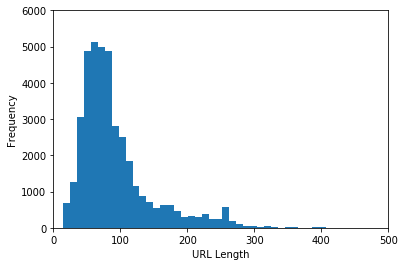

In [7]:
%matplotlib inline

plt.hist(numChars, 200)
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.axis([0, 500, 0, 6000])
plt.show()

In [8]:
charsList = [list(url) for url in urls]

from collections import defaultdict

frequency = defaultdict(int)

for chars in charsList:
  for char in chars:
    frequency[char] += 1

print('totally %s characters found.'%(len(frequency)))

totally 98 characters found.


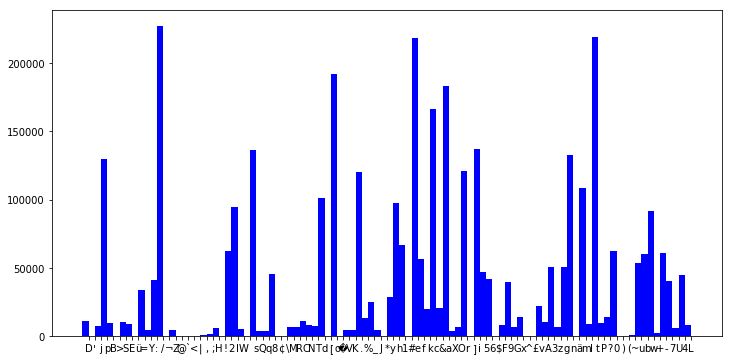

In [11]:
chars = frequency.keys()
freqs = frequency.values()

pos = np.arange(len(chars))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(chars)

plt.bar(pos, freqs, width, color='b')
# %matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]
plt.show()

In [12]:
frequency2 = defaultdict(int)

for char, count in frequency.items():
  if (count < 5):
    frequency2[char] = count

print('totally %s characters with occurrence less than 5.'%(len(frequency2)))

for k, v in frequency2.items():
    print('%s : %s'%(k,v))

totally 6 characters with occurrence less than 5.
\ : 1
ü : 1
£ : 4
¢ : 4
ä : 1
> : 1


In [13]:
dictionary = defaultdict(int)

id = 0

for char, count in frequency.items():
  dictionary[char] = id
  id += 1

corpus = [[dictionary[char] for char in chars] for chars in charsList]

In [14]:
Y = list(df.phishing)

from sklearn.model_selection import train_test_split

corpus_train, corpus_test, Y_train, Y_test = train_test_split(corpus, Y, test_size=0.2, random_state=42)

In [15]:
import pickle

pickle.dump(corpus_train, open( "corpus_train.pkl", "wb" ))
pickle.dump(corpus_test, open( "corpus_test.pkl", "wb" ))
pickle.dump(Y_train, open( "Y_train.pkl", "wb" ))
pickle.dump(Y_test, open( "Y_test.pkl", "wb" ))

In [2]:
# start from here during next runs, to skip data pre-processing steps

import pickle

corpus_train = pickle.load( open( "corpus_train.pkl", "rb" ) )
corpus_test = pickle.load( open( "corpus_test.pkl", "rb" ) )
Y_train = pickle.load( open( "Y_train.pkl", "rb" ) )
Y_test = pickle.load( open( "Y_test.pkl", "rb" ) )

In [3]:
import tensorflow as tf

import tflearn

# on g2.2xlarge (1 GPU, 8 vCPUs, 15 GiB memory)

tflearn.init_graph(num_cores=8, gpu_memory_fraction=0.8)

intra_op_parallelism_threads: 8
inter_op_parallelism_threads: 8
gpu_options {
  per_process_gpu_memory_fraction: 0.8
}
allow_soft_placement: true

In [4]:
from tflearn.data_utils import to_categorical, pad_sequences

trainX_ = pad_sequences(corpus_train, maxlen=150, value=98)
testX_ = pad_sequences(corpus_test, maxlen=150, value=98)

trainY_ = to_categorical(Y_train, nb_classes=2)
testY_ = to_categorical(Y_test, nb_classes=2)

trainX, trainY = tflearn.data_utils.shuffle(trainX_, trainY_)
testX, testY = tflearn.data_utils.shuffle(testX_, testY_)

In [5]:
from tflearn.layers.conv import conv_1d, global_max_pool
from tflearn.layers.merge_ops import merge

net = tflearn.input_data(shape=[None, 150])
net = tflearn.embedding(net, input_dim=99, output_dim=32)
branch2 = conv_1d(net, 128, 2, padding='valid', activation='relu', regularizer="L2")
branch3 = conv_1d(net, 128, 3, padding='valid', activation='relu', regularizer="L2")
branch4 = conv_1d(net, 128, 4, padding='valid', activation='relu', regularizer="L2")
branch5 = conv_1d(net, 128, 5, padding='valid', activation='relu', regularizer="L2")
net = merge([branch2, branch3, branch4, branch5], mode='concat', axis=1)
net = tf.expand_dims(net, 2)
net = global_max_pool(net)
net = tflearn.dropout(net, 0.8)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy')

model = tflearn.DNN(net, tensorboard_verbose=3)

In [25]:
accuracies = []

for i in range(10):
  model.fit(trainX, trainY, validation_set=(testX, testY), shuffle=True, show_metric=True, n_epoch=1, batch_size=32)
  model.save("cnn%s.tfl"%(i+1))
  accuracy = model.evaluate(testX_, testY_)
  accuracies.append(accuracy)
  # print('At epoch %d, the accuracy against test data is %s'%((i+1), accuracy))

Training Step: 9999  | total loss: 0.05292 | time: 87.701s
| Adam | epoch: 010 | loss: 0.05292 - acc: 0.9852 -- iter: 31968/32000
Training Step: 10000  | total loss: 0.05541 | time: 89.597s
| Adam | epoch: 010 | loss: 0.05541 - acc: 0.9836 | val_loss: 0.02316 - val_acc: 0.9920 -- iter: 32000/32000
--
INFO:tensorflow:/home/ubuntu/phishing-urls/notebook/cnn10.tfl is not in all_model_checkpoint_paths. Manually adding it.
At epoch 10, the accuracy agaist test data is [0.99199999999999999]


In [31]:
max_accuracy = 0.0
idx_at_max = 0

for idx, accuracy in enumerate(accuracies):
    print('At epoch %d, the accuracy against test data is %s'%((idx+1), accuracy[0]))
    if (accuracy[0] > max_accuracy):
        max_accuracy = accuracy[0]
        idx_at_max = idx

print('At epoch %d, the maximum accuracy against test data is %s'%((idx_at_max+1), max_accuracy))

At epoch 1, the accuracy against test data is 0.97575
At epoch 2, the accuracy against test data is 0.98525
At epoch 3, the accuracy against test data is 0.98775
At epoch 4, the accuracy against test data is 0.988
At epoch 5, the accuracy against test data is 0.988875
At epoch 6, the accuracy against test data is 0.992375
At epoch 7, the accuracy against test data is 0.990625
At epoch 8, the accuracy against test data is 0.9935
At epoch 9, the accuracy against test data is 0.991875
At epoch 10, the accuracy against test data is 0.992
At epoch 8, the maximum accuracy against test data is 0.9935


In [6]:
# load the model with the highest accuracy if the last one does not give the highest accuracy

model.load('cnn8.tfl')

INFO:tensorflow:Restoring parameters from /home/ubuntu/phishing-urls/notebook/cnn8.tfl


In [7]:
accuracy_train = model.evaluate(trainX_, trainY_)[0]

print('The accuracy against train data is %s'%('{percent:.2%}'.format(percent=accuracy_train)))

accuracy_test = model.evaluate(testX_, testY_)[0]

print('The accuracy against test data is %s'%('{percent:.2%}'.format(percent=accuracy_test)))

The accuracy against train data is 99.68%
The accuracy against test data is 99.35%


In [8]:
null_accuracy = max(testY_.mean(), (1 - testY_.mean()))

print('null accuracy is %s'%('{percent:.2%}'.format(percent= null_accuracy)))

null accuracy is 50.00%


In [9]:
import numpy as np

predict_labels = np.zeros(len(testX_))

batch_size = 100
batches = len(testX_) // batch_size

# convert prediction probabilities to prediction labels
for i in range(batches):
    start = i * batch_size
    end = (i+1) * batch_size
    pred = model.predict(testX_[start:end])
    for j in range(batch_size):
        if (pred[j][0] < pred[j][1]):
            predict_labels[start + j] = 1

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predict_labels)

print('true negatives: %s'%cm[0,0])
print('false negatives: %s'%cm[1,0])
print('true positives: %s'%cm[1,1])
print('false positives: %s'%cm[0,1])

fpr = '{percent:.3%}'.format(percent= cm[0,1] / (cm[1,1] + cm[0,1]))
fnr = '{percent:.3%}'.format(percent= cm[1,0] / (cm[0,0] + cm[1,0]))
                             
print('false postive rate: %s'%fpr)
print('false negative rate: %s'%fnr)

true negatives: 3965
false negatives: 31
true positives: 3983
false positives: 21
false postive rate: 0.524%
false negative rate: 0.776%


In [11]:
from sklearn.metrics import precision_score

print('precision score: %s'%precision_score(Y_test, predict_labels))


from sklearn.metrics import recall_score

print('recall score: %s'%recall_score(Y_test, predict_labels))


from sklearn.metrics import f1_score

print('f1 score: %s'%f1_score(Y_test, predict_labels))

precision score: 0.994755244755
recall score: 0.992277030394
f1 score: 0.993514592168


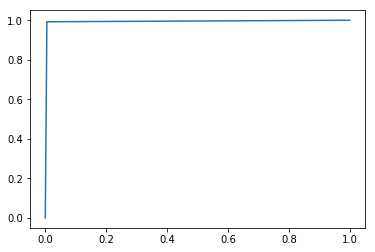

In [12]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predict_labels, pos_label=1)

import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.show() 